In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, entropy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Data = pd.read_csv('GPSData.csv')
Data = pd.read_csv('GPSandClinicalData.csv')

In [3]:
Data.head()

,Wear Frac,DestinationType,Distance,Duration,Mean Speed,TripDuration,Relative_Freq,Relative_Duration,SubjID,NewBrace,Age,Diagnosis,BaselineYrs,6mwt,10mwt_ss,10mwt_fast,Mean Lat,Mean Lon,LocID
0,0.015000,Res,12.229512,2.772222,0.215601,0.017824,0.014925,0.021452,CBR21,1,65,poliomyelitis,60.0,231.93,0.69,0.85,41.732207,-88.132441,2
1,0.063091,Inst,6.302016,1.758333,0.230411,0.011921,0.014925,0.013607,CBR21,1,65,poliomyelitis,60.0,231.93,0.69,0.85,41.783632,-88.188553,3
2,0.000000,Com,5.095353,1.016389,0.591493,0.008218,0.014925,0.007865,CBR21,1,65,poliomyelitis,60.0,231.93,0.69,0.85,41.765985,-88.206360,4
3,0.000000,Com,5.172335,0.366111,1.607549,0.001505,0.029851,0.004252,CBR21,1,65,poliomyelitis,60.0,231.93,0.69,0.85,41.760925,-88.208135,5
4,0.000000,Com,2.871296,0.052778,4.483316,0.003704,0.044776,0.001827,CBR21,1,65,poliomyelitis,60.0,231.93,0.69,0.85,41.760981,-88.242395,6


In [4]:
len(Data)

2181

In [5]:
Data.columns

Index(['Wear Frac', 'DestinationType', 'Distance', 'Duration', 'Mean Speed',
       'TripDuration', 'Relative_Freq', 'Relative_Duration', 'SubjID',
       'NewBrace', 'Age', 'Diagnosis', 'BaselineYrs', '6mwt', '10mwt_ss',
       '10mwt_fast', 'Mean Lat', 'Mean Lon', 'LocID'],
      dtype='object')

In [6]:
for s in Data['SubjID'].unique():
    lat=Data.loc[(Data['SubjID']==s)&(Data['NewBrace']==1),'Mean Lat']
    lon=Data.loc[(Data['SubjID']==s)&(Data['NewBrace']==1),'Mean Lon']
    locvar=np.log(np.var(lat)+np.var(lon))
    print(s,locvar)

CBR21 1.50733182426
CBR30 -1.79845309713
CBR22 -0.853575022274
CBR27 -4.81679906589
CBR26 -4.42196489636
CBR11 -6.07875192639
CBR16 -3.23282568718
CBR28 -2.87019739538
CBR15 6.63558903507
CBR25 -4.07392611008
CBR19 -2.59472203305
CBR08 -5.67261584433
CBR24 -5.04049960067
CBR31 -3.59248688978


In [7]:
newbrace = 1
for s in Data.SubjID.unique():
    Data_ = Data[(Data['SubjID']==s)&(Data['NewBrace']==newbrace)]
    
    print(s,np.sum(np.unique(Data_['Relative_Duration'])),len(np.unique(Data_['Relative_Duration'])), len(np.unique(Data_['LocID'])))


CBR21 1.0 39 39
CBR30 0.997640757508 82 83
CBR22 0.999185655695 28 29
CBR27 1.0 2 2
CBR26 0.990781177452 30 33
CBR11 0.996556359807 52 57
CBR16 0.997422727858 30 31
CBR28 1.0 4 4
CBR15 1.0 11 11
CBR25 1.0 12 12
CBR19 1.0 4 4
CBR08 0.992913777914 24 25
CBR24 1.0 20 20
CBR31 0.995418374729 19 20


In [8]:
Featsubj = pd.DataFrame(data=[],columns=['SubjID','NewBrace','Nlocs','LocVar','MedianDur','MedianSpd',
                                         'MeanDistHome','top2RelDur','Entropy', 'Age', 'BaselineYrs', '6mWT', '10mWTss',
                                         '10mWTfast','WearFrac'])

In [9]:
ind = 0
for newbrace in Data.NewBrace.unique():
    for s in Data.SubjID.unique():
        ind+=1
        Data_ = Data[(Data['SubjID']==s)&(Data['NewBrace']==newbrace)]
        
        nlocs = len(Data_['LocID'].unique())
        
        locvar=np.log(np.var(Data_['Mean Lat']) + np.var(Data_['Mean Lon']))        
        
        medDur = Data_['Duration'].median() #*24 #HOURS
        
        medSpd = Data_['Mean Speed'].median()
  
        meanDistHome = Data_['Distance'].mean()/1000
        
        top2RelDur = np.sum(np.unique(Data_['Relative_Duration'])[-2:])
        
        Entropy = entropy(np.unique(Data_['Relative_Duration']))

        WearFrac = np.nansum(Data_['Wear Frac']*Data_['Duration'])/(np.nansum(Data_['Duration'])+1e-16)

        
        fpd=(pd.DataFrame({'SubjID':s,'NewBrace':newbrace,'Nlocs':nlocs,'LocVar':locvar,'MedianDur':medDur,
                         'MedianSpd':medSpd,'MeanDistHome':meanDistHome, 'top2RelDur':top2RelDur,'Entropy':Entropy,
                          'Age':Data_['Age'].unique(), 'BaselineYrs': Data_['BaselineYrs'].unique(), 
                          '6mWT':Data_['6mwt'].unique(), '10mWTss':Data_['10mwt_ss'].unique(), 
                          '10mWTfast':Data_['10mwt_fast'].unique(),'WearFrac':WearFrac},index=[ind]))
    
        Featsubj=pd.concat([Featsubj,fpd])

    

In [10]:
Featsubj.head()

,10mWTfast,10mWTss,6mWT,Age,BaselineYrs,Entropy,LocVar,MeanDistHome,MedianDur,MedianSpd,NewBrace,Nlocs,SubjID,WearFrac,top2RelDur
1,0.85,0.69,231.93,65.0,60.0,2.061553,1.507332,0.107750,0.661944,1.015304,1.0,39.0,CBR21,0.007118,0.665099
2,1.47,1.20,452.17,55.0,37.0,2.853499,-1.798453,0.021663,0.411111,0.921783,1.0,83.0,CBR30,0.910122,0.471777
3,1.20,1.00,332.61,28.0,2.0,1.817652,-0.853575,0.022623,0.511111,0.828132,1.0,29.0,CBR22,0.241715,0.686630
4,0.63,0.46,133.60,72.0,70.0,0.471462,-4.816799,0.007647,0.491389,2.330390,1.0,2.0,CBR27,1.000000,1.000000
5,1.58,1.15,512.14,52.0,0.5,2.367757,-4.421965,0.005246,0.224167,0.658080,1.0,33.0,CBR26,0.896616,0.506524


## Cbrace vs Baseline features

In [33]:
x.values-y.values

array([  19.,   11.,   -1.,   27.,  107.,   17.,   15.,   19.,   38.,
         19.,    3.,   33.,   14.,   10.])

Nlocs -0.578935556418 5.34527321778 0.0016782007475
LocVar -0.531878970622 -1.197766599 0.103370644168
MedianDur -0.201362187622 0.175535648468 0.635069487841
MedianSpd -0.562690168386 0.704540893471 0.216428403911
Entropy -0.627741816962 0.918208282056 0.0107559333356
6mWT -0.158951909275 113.820835475 0.375657876085
10mWTss -0.309686160076 0.38549011434 0.128500309619
WearFrac -0.549390147583 0.307511496362 0.0890553911572


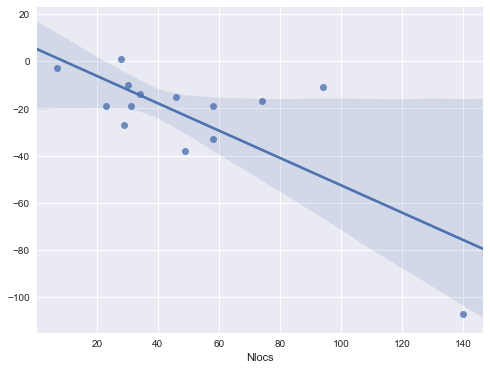

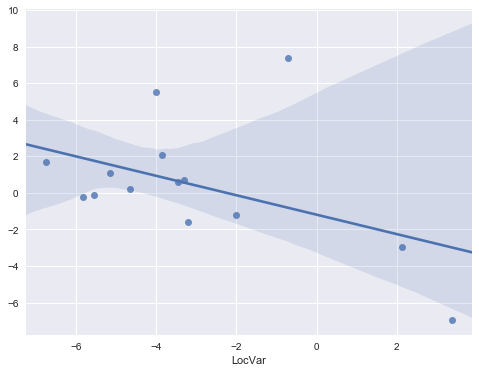

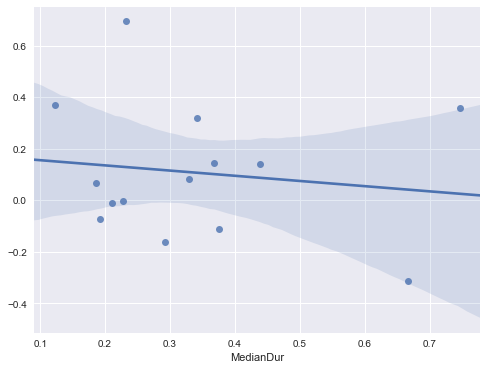

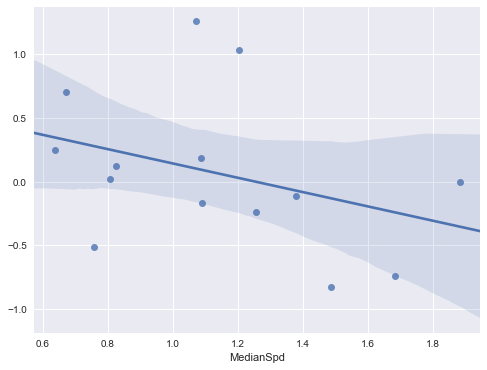

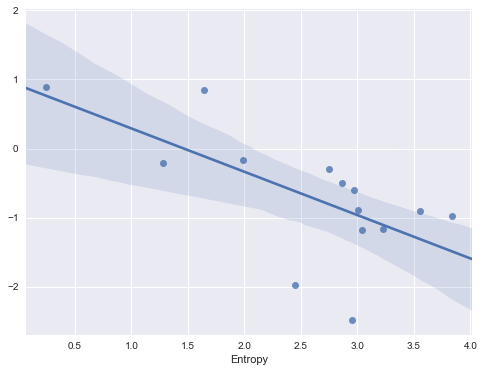

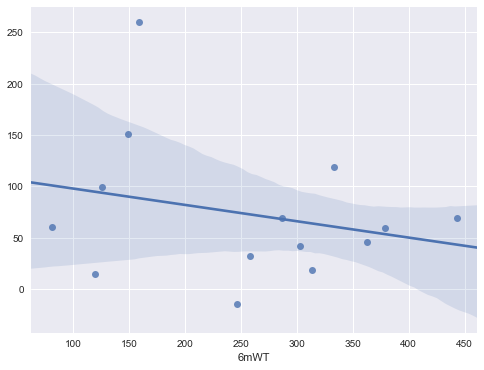

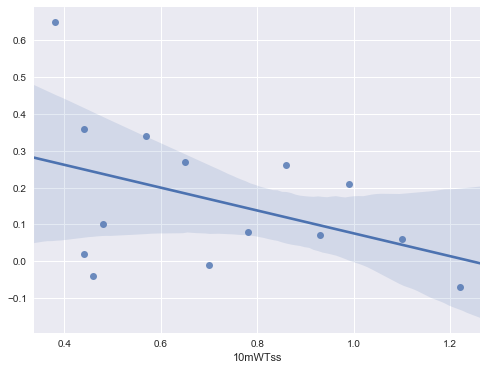

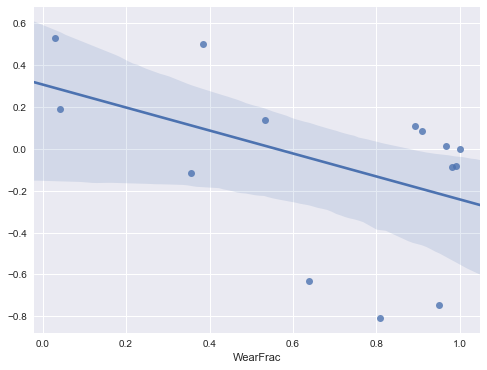

In [36]:
from scipy import stats
features = ['Nlocs','LocVar','MedianDur','MedianSpd','Entropy','6mWT','10mWTss','WearFrac']
outcome = ['WearFrac']

for f in features:
    x = Featsubj[Featsubj['NewBrace']==0][f]
    y = Featsubj[Featsubj['NewBrace']==1][f]
    x-y
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,(y.values-x.values))
    print(f, slope,intercept,p_value)
    plt.figure(figsize=(8,6))
    sns.regplot(x,(y.values-x.values))

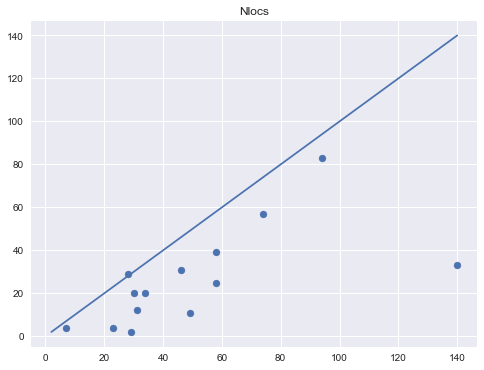

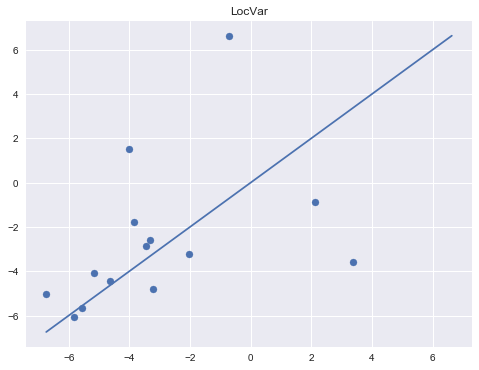

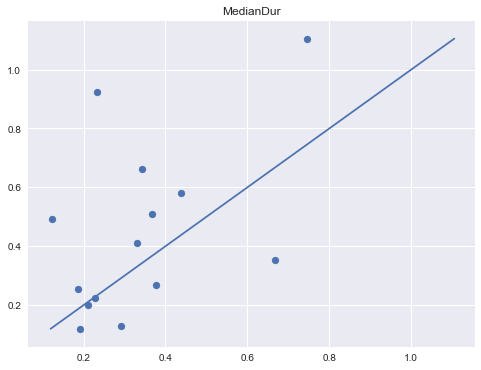

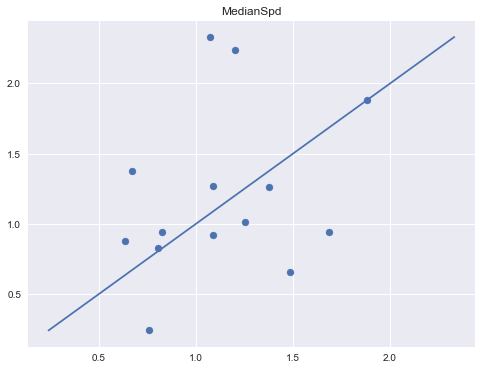

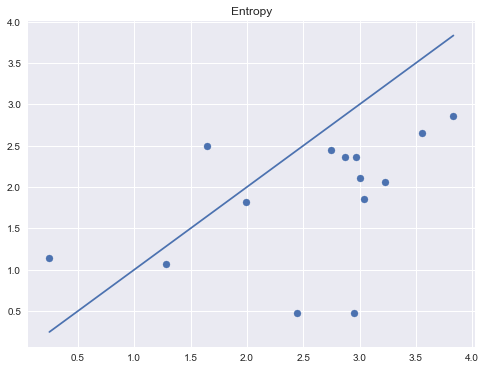

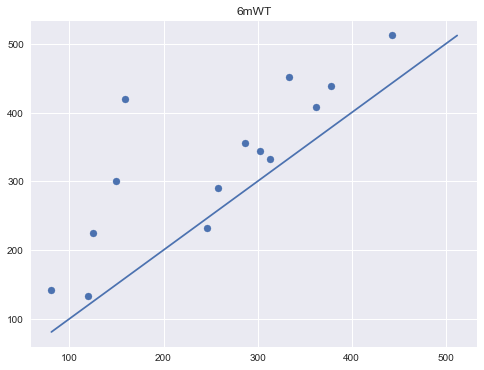

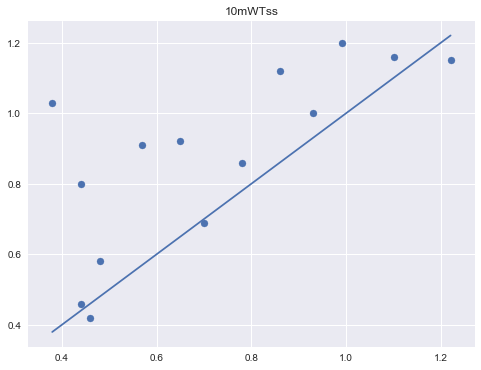

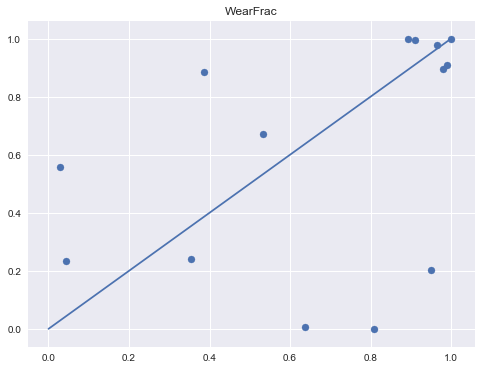

In [11]:
features = ['Nlocs','LocVar','MedianDur','MedianSpd','Entropy','6mWT','10mWTss','WearFrac']
outcome = ['WearFrac']

for f in features:
    x = Featsubj[Featsubj['NewBrace']==0][f]
    y = Featsubj[Featsubj['NewBrace']==1][f]
    plt.figure(figsize=(8,6))
    plt.scatter(x,y)    
    mx=min(x)
    my=min(y)
    m = min(mx,my)
    Mx=max(x)
    My=max(y)
    M =max(Mx,My)
    plt.plot([m,M],[m,M])
    plt.title(f)
    if f == 'MeanDistHome':
        plt.xlim([-10,200])
        plt.ylim([-10,200])
    
    


The more the features between braces are correlated, the more the behavior with the Cbrace is similar to that of the Baseline

## Grouping individuals based on preference at wearing Baseline or Cbrace device

In [12]:
x = Featsubj[Featsubj['NewBrace']==0]['WearFrac']
y = Featsubj[Featsubj['NewBrace']==1]['WearFrac']
ei= y.values-x.values
stdei = np.std(ei)

In [13]:
stdei

0.394717692979553

In [14]:
Databaseline = Featsubj[Featsubj['NewBrace']==0].copy()
Databaseline['Preference'] = 'No_Preference'
ind1 = np.where(ei>=0.4)
Databaseline['Preference'].values[ind1]='Cbrace'
ind0 = np.where(ei<=-.4)
Databaseline['Preference'].values[ind0]='Baseline'


In [15]:
Databaseline

,10mWTfast,10mWTss,6mWT,Age,BaselineYrs,Entropy,LocVar,MeanDistHome,MedianDur,MedianSpd,NewBrace,Nlocs,SubjID,WearFrac,top2RelDur,Preference
15,0.96,0.70,246.46,65.0,60.00,3.228757,-4.000276,0.008493,0.341667,1.254397,0.0,58.0,CBR21,0.638017,0.266390,Baseline
16,1.18,0.99,333.45,55.0,37.00,3.832470,-3.852770,0.010248,0.329444,1.088038,0.0,94.0,CBR30,0.990668,0.164028,No_Preference
17,1.11,0.93,313.69,28.0,2.00,1.987643,2.116022,0.175603,0.368056,0.806337,0.0,28.0,CBR22,0.354997,0.647533,No_Preference
18,0.60,0.44,119.18,72.0,70.00,2.953799,-3.216065,0.013437,0.122222,1.072029,0.0,29.0,CBR27,0.892241,0.231366,No_Preference
19,1.73,1.22,443.20,52.0,0.50,2.867158,-4.645246,0.004961,0.228333,1.486714,0.0,140.0,CBR26,0.980971,0.410230,No_Preference
20,0.96,0.65,302.49,35.0,5.00,1.281291,-5.824081,0.004372,0.191667,0.823318,0.0,74.0,CBR11,0.028618,0.809179,Cbrace
21,0.40,0.38,159.05,44.0,1.00,2.966389,-2.020028,0.027327,0.186667,1.377935,0.0,46.0,CBR16,1.000000,0.348617,No_Preference
22,0.76,0.57,286.89,44.0,0.08,2.446435,-3.446741,0.008090,0.438056,1.203276,0.0,23.0,CBR28,0.909197,0.444628,No_Preference
23,0.50,0.44,149.15,68.0,0.50,3.042272,-0.720593,0.033630,0.746667,0.670741,0.0,49.0,CBR15,0.808373,0.294365,Baseline
24,0.99,0.78,258.17,68.0,66.00,3.006295,-5.156899,0.005365,0.376111,1.882578,0.0,31.0,CBR25,0.965639,0.246368,No_Preference


In [16]:
Databaselinenorm= Databaseline[features+['Age','BaselineYrs']].apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x))  )

In [17]:
Databaselinenorm['Preference']=Databaseline['Preference']

In [18]:
Databaselinemelt=pd.melt(Databaselinenorm,id_vars='Preference',value_vars=features+['Age','BaselineYrs'])

In [19]:
Databaselinemelt['value'] = pd.to_numeric(Databaselinemelt['value'])

In [20]:
Databaselinemelt.head()

,Preference,variable,value
0,Baseline,Nlocs,0.383459
1,No_Preference,Nlocs,0.654135
2,No_Preference,Nlocs,0.157895
3,No_Preference,Nlocs,0.165414
4,No_Preference,Nlocs,1.000000


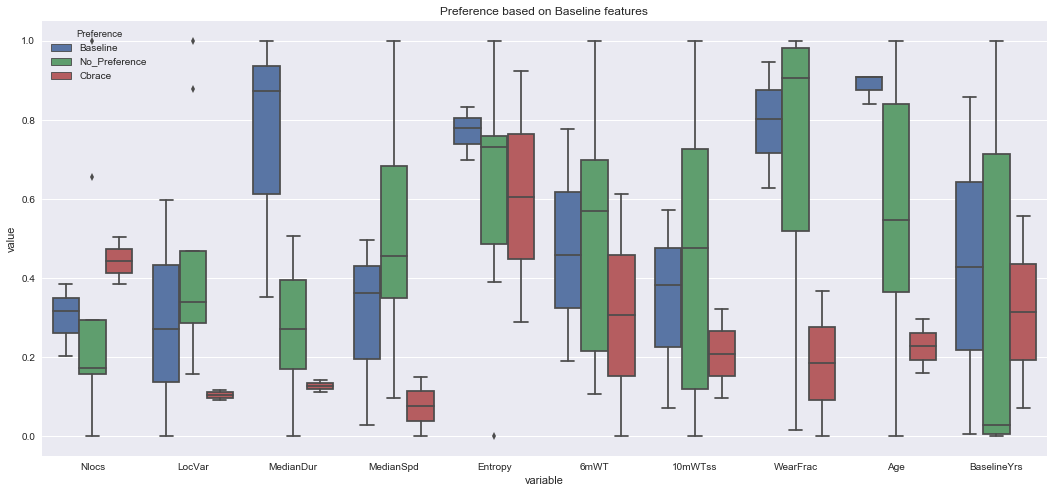

In [21]:
plt.figure(figsize=(18,8))
sns.boxplot(data=Databaselinemelt,x='variable',y='value',hue='Preference')
plt.title('Preference based on Baseline features')

## Pairwise correlations between baseline features and Cbrace Wear Time

In [22]:
plt.scatter(F['6mWT'],F['WearFrac'])

NameError: name 'F' is not defined

In [23]:
F = Featsubj[Featsubj['NewBrace']==0].reset_index(drop=True).copy()
outcome = Featsubj[Featsubj['NewBrace']==1]['WearFrac'].reset_index(drop=True).rename('WearFracCBR')
F = pd.concat((F,outcome),axis=1)
F=F.drop('NewBrace',axis=1)
F=F[['WearFracCBR']+features]
F.astype(float)
F.Age = pd.to_numeric(F.Age)
F.Nlocs = pd.to_numeric(F.Nlocs)
fcorr = F.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=fcorr,annot=True,fmt='.1f')
sns.set_context('talk',font_scale=1.5)
plt.title('Baseline Features')

AttributeError: 'DataFrame' object has no attribute 'Age'

** We used 3 main types of features: Mobility (GPS derived), demographics (age, years using baseline device) and Clinical (6mWT and 10MWT)**

* There was no strong linear correlation (Pearson's r <= .6) between any of the baseline features and the usage (wear time ratio) of the new Cbrace device.


* The feature with the strongest correlation (r = 0.6) was the Median duration (stay) at a given location, which was negatively correlated with wear time. This could be indicative that subjects who wore the Cbrace more, were the ones who tended to use their baseline brace for shorter trips/visits.


* Interestingly there was no correlation at all (r = 0.0) with the Clinical tests using their baseline or Cbrace (see following plot). This is suggestive that performance with their baseline/Cbrace device was not correlated with usage of the Cbrace


* Wear fraction of their baseline device also did not correlate substantially (r = 0.4) with the wear fraction of the Cbrace across all subjects (however see other plot showing clustring of subjects into 3 groups)

## Pairwise correlations between Cbrace features and Cbrace Wear Time

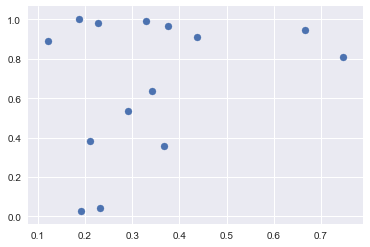

In [24]:
plt.scatter(F['MedianDur'],F['WearFrac'])

In [25]:
#correlations between Cbrace mobility features and wear time
F = Featsubj[Featsubj['NewBrace']==1].reset_index(drop=True).copy()
F=F.drop('NewBrace',axis=1)
F=F[features]
F['WearFrac'].rename('WearFracCBR')
F.astype(float)
F.Age = pd.to_numeric(F.Age)
F.Nlocs = pd.to_numeric(F.Nlocs)
fcorr = F.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=fcorr,annot=True,fmt='.1f')
sns.set_context('talk',font_scale=1.5)
plt.title('Cbrace Features')

AttributeError: 'DataFrame' object has no attribute 'Age'

As before we do not see any significant correlation between Cbrace wear time and Cbrace features (clinical, mobility)